<h2>2) Bag of Words(BoW)</h2>

<h3>1. Bag of Words란?</h3>

<p>단어들의 순서는 전혀 고려하지 않고, 출현 빈도에만 집중하는 텍스트 데이터 수치화 표현방법</p>

<h4>BoW를 만드는 두 가지 과정</h4>
<p>(1) 우선, 각 단어에 고유한 정수 인덱스를 부여합니다.</p>
<p>(2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듭니다.

<b>문서1 : 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.</b>

<p>위의 문서1에 대해서 BoW를 만들어보도록 하겠습니다. <br>
아래 코드는 입력된 문서에 대해서 단어 집합을 만들어 인덱스를 할당하고, BoW를 만드는 코드입니다.</p>

In [5]:
from konlpy.tag import Okt
import re
okt=Okt()

In [7]:
token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.") 

In [8]:
# 정규 표현식을 통해 온점을 제거하는 정제 작업입니다.
token=okt.morphs(token)
# OKT 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에, token에다가 넣습니다.

In [11]:
word2index={}  
bow=[]  
for voca in token:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index) 

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [12]:
bow

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]

<h3>2. Bag of Words의 다른 예제들</h3>

<b>BoW에 있어서 중요한 것은 단어의 등장 빈도입니다. <br>
단어의 순서 즉, 인덱스의 순서는 전혀 상관없습니다.</b>

<b>문서2 : 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.</b>

<p>위의 코드에 문서2로 입력으로 하여 인덱스 할당과 BoW를 만든느 것을 진행한다면 아래 결과가 나옴</p>

In [14]:
from IPython.display import Image

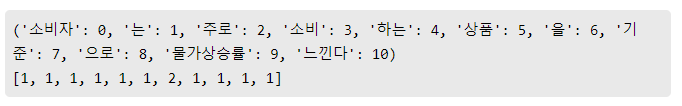

In [15]:
Image("Bag.PNG")

<p>문서 1과 문서2를 합쳐서 (이를 문서3이라고 명명합시다.)BoW를 만들 수도 있습니다.</p><br>
<b>문서3 : 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다. 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.</b>

<p>위의 코드에 문서3을 입력으로 하여 인덱스 할당과 BoW를 만든다면 아래와 같은 결과가 나옵니다.</p>

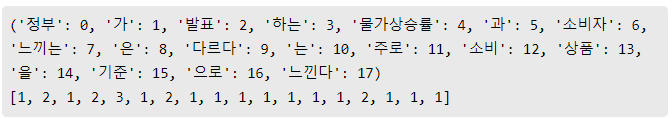

In [17]:
Image("Bag3.PNG")

<h3>3. CountVectorizer 클래스로 BoW 만들기</h3>

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


<p>예제 문장에서 you와 love는 두 번씩 언급되었으므로 각각 인덱스 2와 인덱스 4에서 2의 값을 가지며, 그 외의 값에서는 1의 값을 가지는 것을 볼 수 있습니다</p>

<p>CountVectorizer는 단지 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행하고 BoW를 만든다는 점이다.</p>

<h3>4. 불용어를 제거한 BoW 만들기</h3>

<b>영어의 BoW를 만들기 위해 사용하는 CountVectorizer는 불용어를 지정하면, 불용어는 제외하고 BoW를 만들 수 있도록 불용어 제거 기능을 지원하고 있습니다.</b>

<h4>(1) 사용자가 직접 정의한 불용어 사용</h4>

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


<h4>(2) CountVectorizer에서 제공하는 자체 불용어 사용</h4>

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}
